In [1]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Import data
data=pd.read_csv('spam_ham_dataset.csv')
data=data.drop(['Unnamed: 0','label'],axis=1)

print('shape of data',data.shape) #Checking shape of data
data.head()

shape of data (5171, 2)


,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.dtypes

text         object
label_num     int64
dtype: object

In [4]:
#Checking null values 
data.isna().sum()

text         0
label_num    0
dtype: int64

In [5]:
data['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

<AxesSubplot:xlabel='label_num', ylabel='count'>

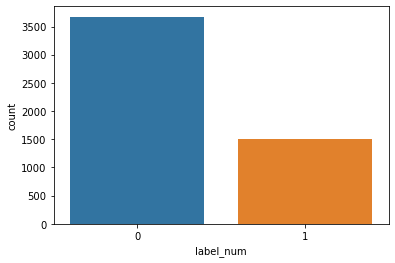

In [6]:
sns.countplot(data['label_num'])

In [7]:
#Stemming and Lemmitization
ps=PorterStemmer()
wl=WordNetLemmatizer()

In [8]:
#Vectorization
tfid=TfidfVectorizer(ngram_range=(1,1))

In [9]:
#Data Preprocessing
corpus=[]
for i in range(0,len(data['text'])):
    msg=re.sub('[^a-zA-Z]',' ',data['text'][i])
    msg=msg.lower()
    msg=msg.split()
    msg=[wl.lemmatize(word) for word in msg if word not in set(stopwords.words('english'))]
    msg=' '.join(msg)
    corpus.append(msg)
    

In [10]:
y=data['label_num']

In [11]:
# Building a Model
trainx,testx,trainy,testy=train_test_split(corpus,y,test_size=0.3,random_state=42)

In [12]:
trainx=tfid.fit_transform(trainx)
testx=tfid.transform(testx)

In [13]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(3619, 35274)
(3619,)
(1552, 35274)
(1552,)


## LogisticRegression

In [14]:
logreg=LogisticRegression()
logreg.fit(trainx,trainy)

LogisticRegression()

In [15]:
logreg_predict=logreg.predict(testx)
logreg_predict1=logreg.predict(trainx)

In [16]:
print(accuracy_score(testy,logreg_predict))
print(accuracy_score(trainy,logreg_predict1))

0.9858247422680413
0.995855208621166


In [17]:
confusion_matrix(testy,logreg_predict)

array([[1105,   16],
       [   6,  425]], dtype=int64)

In [18]:
print(classification_report(testy,logreg_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.96      0.99      0.97       431

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.98      1552
weighted avg       0.99      0.99      0.99      1552



## MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(trainx,trainy)

MultinomialNB()

In [20]:
nb_pred=nb.predict(testx)
nb_pred1=nb.predict(trainx)

In [21]:
print(accuracy_score(testy,nb_pred))
print(accuracy_score(trainy,nb_pred1))

0.9201030927835051
0.962420558165239


In [22]:
confusion_matrix(testy,nb_pred)

array([[1121,    0],
       [ 124,  307]], dtype=int64)

In [23]:
print(classification_report(testy,nb_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1121
           1       1.00      0.71      0.83       431

    accuracy                           0.92      1552
   macro avg       0.95      0.86      0.89      1552
weighted avg       0.93      0.92      0.92      1552



## PassiveAggressiveClassifier

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [25]:
pc=PassiveAggressiveClassifier(random_state=42,max_iter=1000)
pc.fit(trainx,trainy)

PassiveAggressiveClassifier(random_state=42)

In [26]:
pc_pred=pc.predict(testx)
pc_pred1=pc.predict(trainx)

In [27]:
print(accuracy_score(testy,pc_pred))
print(accuracy_score(trainy,pc_pred1))

0.9884020618556701
1.0


In [28]:
confusion_matrix(testy,pc_pred)

array([[1112,    9],
       [   9,  422]], dtype=int64)

In [29]:
print(classification_report(testy,pc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.98      0.98      0.98       431

    accuracy                           0.99      1552
   macro avg       0.99      0.99      0.99      1552
weighted avg       0.99      0.99      0.99      1552

